In [1]:
import pandas as pd
import tensorflow as tf
import keras as k
import sklearn
from xgboost.sklearn import XGBRegressor as xgbr
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.model_selection import cross_val_score  # 交叉检验
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
import matplotlib.pyplot as pyplot
from sklearn.neighbors import KNeighborsRegressor as knr

Using TensorFlow backend.


In [2]:
file =pd.read_csv("./PRSA_data_2010.1.1-2014.12.31.csv")

In [60]:
test=file[35064:] #2014年的数据
train=file[:35064] #2014年以前的数据
train=train.dropna()
test=test.dropna()
train=pd.get_dummies(train)
test=pd.get_dummies(test)

ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
ytest=test["pm2.5"]
xtest=test[['year', 'month','day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]

c:\users\wx\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\wx\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


score: 0.4924407749140013
mae: 44.336295679371695
mse: 4442.026738679487
r2: 0.4924407749140013
ymean: 97.78000934142923


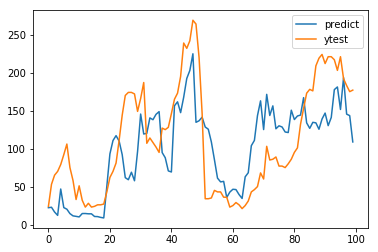

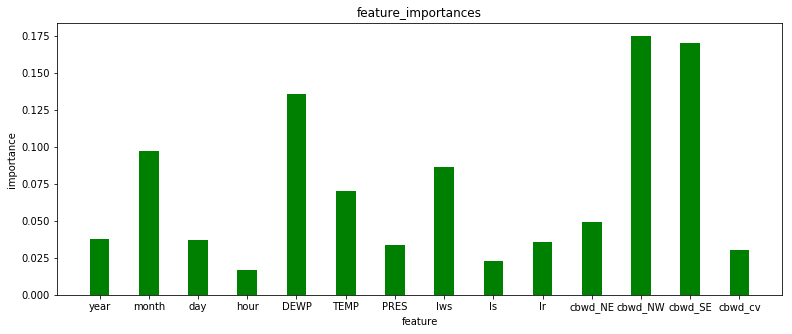

In [91]:
#xgb1
ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
ytest=test["pm2.5"]
xtest=test[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
model_xgb1 = xgbr(max_depth=8, learning_rate=0.1, n_estimators=200, silent=True, objective='reg:gamma')
model_xgb1.fit(xtrain,ytrain)
print("score:",model_xgb1.score(xtest,ytest))
print("mae:",mean_absolute_error(ytest ,model_xgb1.predict(xtest)))
print("mse:",mean_squared_error(ytest ,model_xgb1.predict(xtest)))
print("r2:",r2_score(ytest ,model_xgb1.predict(xtest)))
print("ymean:",ytest.mean())
"""
for i in range(10,200,10):
    model = xgbr(max_depth=8, learning_rate=0.1, n_estimators=i, silent=True, objective='reg:gamma')
    model.fit(xtrain,ytrain)
    mean_squared_error(ytest ,model.predict(xtest))
"""    
pyplot.plot(model_xgb1.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()

x=xtrain.columns
y=model_xgb1.feature_importances_
fig = plt.figure(figsize=(13,5))
plt.bar(x,y,0.4,color="green")
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature_importances")
plt.show() 


c:\users\wx\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\users\wx\appdata\local\programs\python\python36\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


score: 0.9478783492931602
mae: 11.698137676726986
mse: 456.15517295477434
r2: 0.9478783492931602
ymean: 97.78000934142923


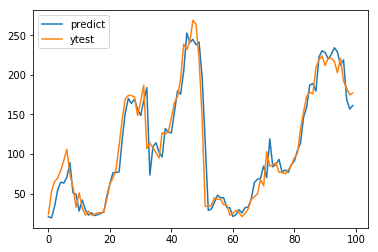

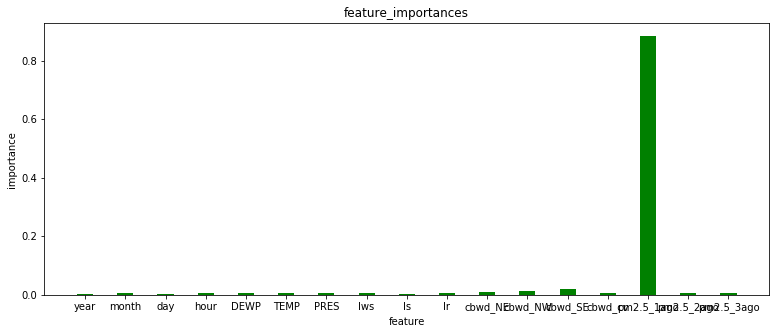

In [57]:
#xgb2
ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',"pm2.5_1ago","pm2.5_2ago","pm2.5_3ago"]]
ytest=test["pm2.5"]
xtest=test[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',"pm2.5_1ago","pm2.5_2ago","pm2.5_3ago"]]
model_xgb2 = xgbr(max_depth=8, learning_rate=0.1, n_estimators=200, silent=True, objective='reg:gamma')
model_xgb2.fit(xtrain,ytrain)
print("score:",model_xgb2.score(xtest,ytest))
print("mae:",mean_absolute_error(ytest ,model_xgb2.predict(xtest)))
print("mse:",mean_squared_error(ytest ,model_xgb2.predict(xtest)))
print("r2:",r2_score(ytest ,model_xgb2.predict(xtest)))
print("ymean:",ytest.mean())
pyplot.plot(model_xgb2.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()


x=xtrain.columns
y=model_xgb2.feature_importances_
fig = plt.figure(figsize=(20,5))
plt.bar(x,y,0.4,color="green")
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("feature_importances")
plt.show() 

c:\users\wx\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(1, 14), activation="relu", return_sequences=False, units=50)`
  if sys.path[0] == '':


Train on 32593 samples, validate on 8564 samples
Epoch 1/50
 - 7s - loss: 64.4881 - val_loss: 64.4582
Epoch 2/50
 - 3s - loss: 63.0759 - val_loss: 63.3232
Epoch 3/50
 - 3s - loss: 62.0511 - val_loss: 63.0334
Epoch 4/50
 - 2s - loss: 61.4973 - val_loss: 63.0578
Epoch 5/50
 - 2s - loss: 61.0988 - val_loss: 63.1859
Epoch 6/50
 - 2s - loss: 60.7625 - val_loss: 63.4034
Epoch 7/50
 - 2s - loss: 60.4282 - val_loss: 63.6746
Epoch 8/50
 - 2s - loss: 60.0883 - val_loss: 64.1028
Epoch 9/50
 - 2s - loss: 59.7595 - val_loss: 64.5537
Epoch 10/50
 - 3s - loss: 59.4542 - val_loss: 65.2143
Epoch 11/50
 - 2s - loss: 59.1478 - val_loss: 65.8411
Epoch 12/50
 - 3s - loss: 58.8327 - val_loss: 66.6010
Epoch 13/50
 - 3s - loss: 58.5125 - val_loss: 67.3631
Epoch 14/50
 - 3s - loss: 58.2351 - val_loss: 68.1428
Epoch 15/50
 - 4s - loss: 57.9434 - val_loss: 68.7675
Epoch 16/50
 - 3s - loss: 57.7425 - val_loss: 69.3026
Epoch 17/50
 - 3s - loss: 57.5433 - val_loss: 69.8150
Epoch 18/50
 - 2s - loss: 57.4027 - val_lo

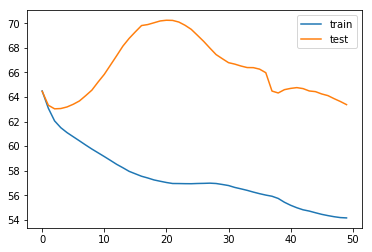

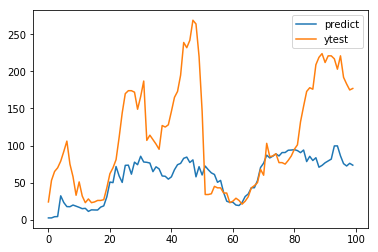

"\nlstm超参数\nactivation='relu'\nloss='mae' \noptimizer='adam'\nepochs=50\nbatch_size=72\nvalidation_data=(xtest, ytest)\nshuffle=False\n"

In [92]:
#lstm

xtrain=np.array(xtrain)
xtest=np.array(xtest)
xtrain = xtrain.reshape((xtrain.shape[0],1,xtrain.shape[1]))
xtest =  xtest.reshape((xtest.shape[0],1,xtest.shape[1]))
# design network
model = Sequential()
model.add(LSTM(output_dim=50, 
                   input_shape=(xtrain.shape[1],xtrain.shape[2]),
                   activation='relu',
                   return_sequences=False))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(xtrain, ytrain, epochs=50, batch_size=72, validation_data=(xtest, ytest), verbose=2, shuffle=False)
# plot history
print("mae:",mean_absolute_error(ytest ,model.predict(xtest)))
print("mse:",mean_squared_error(ytest ,model.predict(xtest)))
print("r2:",r2_score(ytest ,model.predict(xtest)))

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

pyplot.plot(model.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()
"""
lstm超参数
activation='relu'
loss='mae' 
optimizer='adam'
epochs=50
batch_size=72
validation_data=(xtest, ytest)
shuffle=False
"""


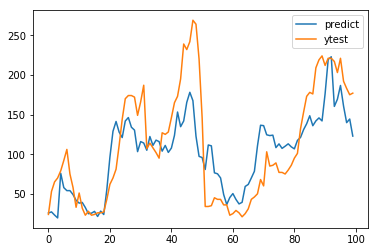

In [86]:
#knn

#from sklearn.model_selection import train_test_split,cross_val_score,mean_absolute_error

ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
ytest=test["pm2.5"]
xtest=test[['year', 'month','day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']]
k=50
knn=knr(k)
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

pyplot.plot(knn.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()

c:\users\wx\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


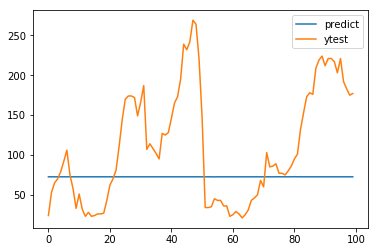

In [94]:
#svm
ytrain=train["pm2.5"]
xtrain=train[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',"pm2.5_1ago","pm2.5_2ago","pm2.5_3ago"]]
ytest=test["pm2.5"]
xtest=test[['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv',"pm2.5_1ago","pm2.5_2ago","pm2.5_3ago"]]

model_svr = SVR()

model_svr.fit(xtrain,ytrain)
pyplot.plot(model_svr.predict(xtest)[:100], label='predict')
pyplot.plot(np.array(ytest)[:100], label='ytest')
pyplot.legend()
pyplot.show()
